## Do not use the Logistic alogrithms in sklearn to build the model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression

## Based on different x1,x2 data to built the Logistic features

In [2]:
np.random.seed(12)
number_observations=5000
x1=np.random.multivariate_normal([0,0],[[1,0.75],[0.75,1]],number_observations)
x2=np.random.multivariate_normal([1,4],[[1,0.75],[0.75,1]],number_observations)
simulated_separableish_feautres=np.vstack((x1,x2)).astype(np.float32)

## Two features

In [3]:
simulated_separableish_feautres

array([[-0.2015173 , -0.6833582 ],
       [ 0.37451947, -0.8280822 ],
       [-0.16189468, -1.2471066 ],
       ...,
       [ 2.3255963 ,  4.181329  ],
       [ 0.24707289,  4.2294044 ],
       [ 1.7190224 ,  4.8253503 ]], dtype=float32)

## Build the plot in two colors to see the true labels

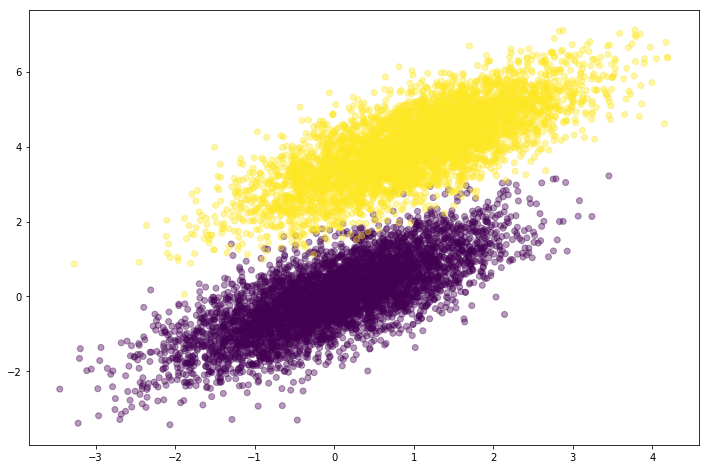

In [4]:
simulated_labels=np.hstack((np.zeros(number_observations),
                                       np.ones(number_observations)))
plt.figure(figsize=(12,8))
plt.scatter(simulated_separableish_feautres[:,0],simulated_separableish_feautres[:,1],
               c=simulated_labels,alpha=0.4)

## Logistic function:$$\sigma =\left(\frac{1}{1+\exp(-t)}\right)$$

In [19]:
def sigmoid(scores):
    return 1/(1+np.exp(-scores))

## Log likelihood function( sum overall the training data): $$L(\theta)=\sum_{i=1}^n{y_i\log (p(x_i;\beta))+(1-y_i)\log(1-p(x_i;\beta))}=\sum_{i=1}^n{y_i\beta^Tx_i-\log(1+\exp^(\beta^Tx_i)}$$

In [20]:
def log_likelihood(features,target,weights):
    scores=np.dot(features,weights)
    l1=np.sum(target*scores-np.log(1+np.exp(scores)))
    return l1

## Gradient Descent $$\beta_{new}=\beta_{old}-\alpha\sum_{n}{(-(target-prediction)}*features)$$

In [21]:
def logistic_regression(features,target,num_steps,learning_rate,add_intercept=False):
    if add_intercept:
        intercept=np.ones((features.shape[0],1))
        features= np.hstack((intercept,features))
        
    weights=np.zeros(features.shape[1])
    
    for step in range(num_steps):
        scores=np.dot(features,weights)
        predictions=sigmoid(scores)
        
        output_error_signal=target-predictions
        gradient=np.dot(features.T,output_error_signal)
        weights+=learning_rate*gradient
        
        if step%10000==0:
            print(log_likelihood(features,target,weights))
    return weights

## Find the best weights

In [22]:
weights = logistic_regression(simulated_separableish_feautres, simulated_labels,
                     num_steps = 300000, learning_rate = 5e-5, add_intercept=True)

-4346.264779152365
-148.70672276805357
-142.9649362310784
-141.54530307157367
-141.060319659308
-140.87031585891606
-140.79025912753815
-140.75505002269915
-140.73914503180956
-140.73183498915878
-140.72843666694826
-140.72684471255326
-140.7260950895047
-140.72574086052296
-140.72557306887177
-140.72549345786166
-140.72545564250748
-140.7254376661433
-140.72542911609156
-140.7254250479478
-140.72542311181698
-140.72542219020235
-140.7254217514527
-140.72542154256132
-140.7254214431011
-140.72542139574284
-140.7254213731925
-140.72542136245457
-140.72542135734136
-140.72542135490647


## The best Weight 

In [19]:
weights

array([-14.09225541,  -5.05899648,   8.28955762])

## Use the sklearn to find the best intercept and coefficients. It would be match with the above weight.

In [22]:
clf=LogisticRegression(fit_intercept=True,C=1e15)
clf.fit(simulated_separableish_feautres,simulated_labels)
print(clf.intercept_,clf.coef_)
print(weights)

[-13.99400797] [[-5.02712572  8.23286799]]
[-14.09225541  -5.05899648   8.28955762]


## See the predict efficiency


In [23]:
print(clf.score(simulated_separableish_feautres,simulated_labels))

0.9948


## Find the predict error

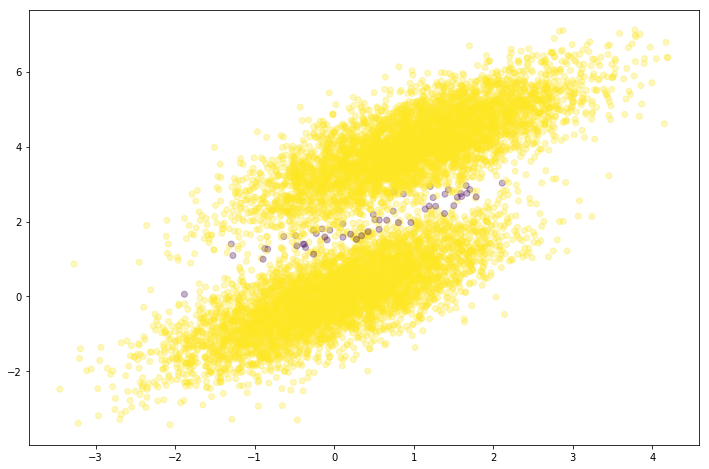

In [63]:
final_scores=clf.predict(simulated_separableish_feautres)
plt.figure(figsize=(12,8))
plt.scatter(simulated_separableish_feautres[:,0],simulated_separableish_feautres[:,1],alpha=0.3,
               c=(final_scores==simulated_labels))